In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Set-up Plotly
tls.set_credentials_file(username="jclasul", api_key="MKXHNoKq9cRqNshsRQlh")
tls.set_config_file(sharing="public")

In [4]:
HR = pd.read_csv("HRIN.csv")

In [5]:
# 35 variables for 1470 persons
HR.shape

(1470, 35)

In [6]:
# List all variables and data types
HR.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [7]:
# Dealing with CATEGORICAL variables
# # # # # # # # # # # #
# Method 1:
# One-Hot encoding
# # # # # # # # # # # #

recast = pd.DataFrame.dropna(pd.get_dummies(HR, sparse=True), axis=[0,1],how="all")
recast_corr = pd.DataFrame.dropna(recast.corr(), axis=[0,1],how="all")

# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=recast_corr.values.tolist(),
                   x=recast.columns.tolist(),
                   y=recast.columns.tolist())])

In [8]:
# # # # # # # # # # # #
# Method 2:
# Label Encoding
# # # # # # # # # # # #
#
# Convert all Object dtypes to Categorical

def TO_CAT(col):
    return col.astype("category").cat.codes
    
encoding = HR.apply(TO_CAT, axis=0)
encoding_corr = pd.DataFrame.dropna(encoding.corr(), axis=[0,1],how="all")

# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=encoding_corr.values.tolist(),
                   x=encoding.columns.tolist(),
                   y=encoding.columns.tolist())])

In [9]:
## Temporary, to get plots working ...

HR2 = HR
HR2.Attrition = HR2.Attrition.astype("category").cat.codes

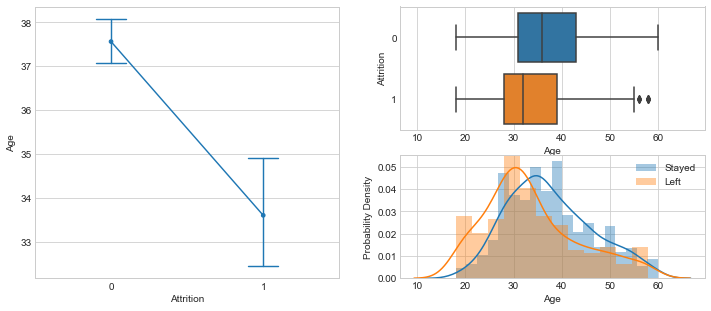

In [10]:
# Some nice plot
# inspired by @Summy Lam
#
#
# colours to come
# additional plots and titles too
#

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

p1 = plt.subplot(2,2,2)
sns.boxplot(y=HR.Attrition, x=HR.Age, orient="h")

p2 = plt.subplot(2,2,4, sharex=p1)
sns.distplot(HR2.loc[HR2["Attrition"] == 0].Age, label="Stayed")
sns.distplot(HR2.loc[HR2["Attrition"] == 1].Age, label="Left")
plt.ylabel("Probability Density")
plt.legend()

p3 = plt.subplot(1,2,1)
with plt.rc_context({'lines.linewidth': 0.8}):
    sns.pointplot(x=HR.Attrition,y=HR.Age, capsize = 0.2)
    plt.show()
    
# Add P-values

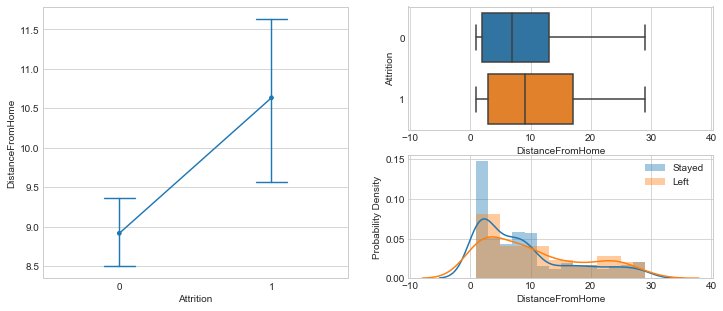

In [11]:
VARPLOT = "DistanceFromHome"

# quick TESTING ONLY !!!
# to automate
#

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

p1 = plt.subplot(2,2,2)
sns.boxplot(y=HR.Attrition, x=HR[VARPLOT], orient="h")
plt.legend()

p2 = plt.subplot(2,2,4, sharex=p1)
sns.distplot(HR2.loc[HR2["Attrition"] == 0][VARPLOT], label="Stayed")
sns.distplot(HR2.loc[HR2["Attrition"] == 1][VARPLOT], label="Left")
plt.ylabel("Probability Density")
plt.legend()

p3 = plt.subplot(1,2,1)
with plt.rc_context({'lines.linewidth': 0.8}):
    sns.pointplot(x=HR.Attrition,y=HR[VARPLOT], capsize = 0.2)
    plt.show()

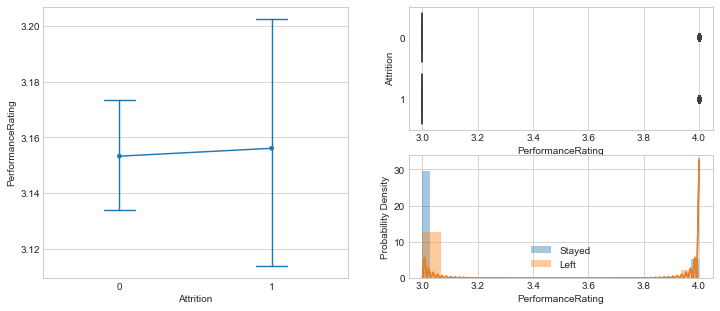

In [12]:
VARPLOT = "PerformanceRating"

# quick TESTING ONLY !!!
# to automate
#

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

p1 = plt.subplot(2,2,2)
sns.boxplot(y=HR.Attrition, x=HR[VARPLOT], orient="h")
plt.legend()

p2 = plt.subplot(2,2,4, sharex=p1)
sns.distplot(HR2.loc[HR2["Attrition"] == 0][VARPLOT], label="Stayed")
sns.distplot(HR2.loc[HR2["Attrition"] == 1][VARPLOT], label="Left")
plt.ylabel("Probability Density")
plt.legend()

p3 = plt.subplot(1,2,1)
with plt.rc_context({'lines.linewidth': 0.8}):
    sns.pointplot(x=HR.Attrition,y=HR[VARPLOT], capsize = 0.2)
    plt.show()

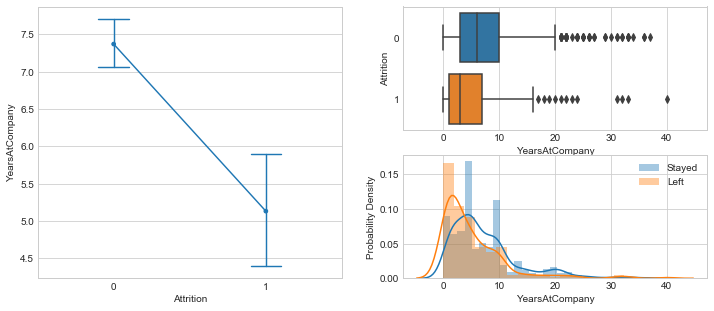

In [13]:
VARPLOT = "YearsAtCompany"

# quick TESTING ONLY !!!
# to automate
#

sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

p1 = plt.subplot(2,2,2)
sns.boxplot(y=HR.Attrition, x=HR[VARPLOT], orient="h")
plt.legend()

p2 = plt.subplot(2,2,4, sharex=p1)
sns.distplot(HR2.loc[HR2["Attrition"] == 0][VARPLOT], label="Stayed")
sns.distplot(HR2.loc[HR2["Attrition"] == 1][VARPLOT], label="Left")
plt.ylabel("Probability Density")
plt.legend()

p3 = plt.subplot(1,2,1)
with plt.rc_context({'lines.linewidth': 0.8}):
    sns.pointplot(x=HR.Attrition,y=HR[VARPLOT], capsize = 0.2)
    plt.show()

In [14]:
# START machine learning
# something
# something else
# finish

In [15]:
# SPLIT data


In [16]:
pd.DataFrame.select_dtypes(HR2, exclude=["object"]).columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')